<a href="https://colab.research.google.com/github/Jeder14/TelecomX_challenge-1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import plotly.express as px

#📌 Extracción

In [2]:
#archivo sin procesar
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

#SOlicitud
response = requests.get(url)
#Diccionario phyton
data = response.json()
#Diccionario a DataFrame sin aplanar
df_data = pd.DataFrame(data)

#vista previa de los datos
df_data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Exploracion de los datos
##### ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
#####✅ Consultar el diccionario para comprender mejor el significado de las variables.
#####✅ Identificar las columnas más relevantes para el análisis de evasión.

In [3]:
#resumen del DataFrame
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df_data.shape

(7267, 6)

In [5]:
columnas_anidadas = df_data.columns[2:]
columnas_anidadas


Index(['customer', 'phone', 'internet', 'account'], dtype='object')

In [6]:
#Eliminar las columnas anidadas iniciales del DataFrame
datos_seleccion = df_data.drop(columns=columnas_anidadas)

## Normalización

In [7]:

#normaliza las columnas anidadas del dataframe datos
lista_de_dataframes = []
for columna in columnas_anidadas:
  columna_temporal = pd.json_normalize(df_data[columna])
  lista_de_dataframes.append(columna_temporal)

lista_de_dataframes.insert(0, datos_seleccion)
datos_normalizados =  pd.concat(lista_de_dataframes, axis=1)

In [8]:
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
#Poner las columnas en minuscula
datos_normalizados.columns = datos_normalizados.columns.str.lower()

#cambiar el punto por guion bajo en las columnas
datos_normalizados.columns = datos_normalizados.columns.str.replace('.', '_')

#visualizacion de datos
datos_normalizados.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Diccionario de datos

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [10]:
datos_normalizados.info()
#Aqui se observa que changes_total aparece como object pero deberia ser float, quiere decir que los numeros están guardados como cadenas u objetos mezclados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


## Conversion

In [11]:
#Primero se convierte a string toda la columna, con astype se convierte cualquier valor a string(texto) asi fuese antes una fecha, numero u otro tipo.
datos_normalizados['charges_total'] = datos_normalizados['charges_total'].astype(str)

In [12]:
#En este caso se realizará una limpieza de simbolos, aunque sin ello se logra el valor numerico, posiblemente los datos se leian como texto desde el origen
datos_normalizados['charges_total'] = datos_normalizados['charges_total'].str.replace('$', '', regex=False).str.strip()

In [13]:
#Convertimos los datos vacios a nan
datos_normalizados['charges_total']=datos_normalizados['charges_total'].replace(' ',np.nan)

In [14]:
#Se confirma que los valores numericos están en comillas, por lo que se leen como texto
print(datos_normalizados['charges_total'].unique())

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [15]:
#Obligamos la lectura numerica
datos_normalizados['charges_total'] = pd.to_numeric( datos_normalizados['charges_total'].astype(str).str.strip(), errors='coerce')

datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [16]:
#checamos cuantos nan tenemos
datos_normalizados.isnull().sum()

,0
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


In [17]:
# Asignadole valor 0 a los datos nulos
datos_normalizados["charges_total"] = datos_normalizados["charges_total"].fillna(0)

In [18]:
#Se crea un nuevo DF, filtrando charges_total
charges_total_zero = datos_normalizados[datos_normalizados["charges_total"] == 0]
charges_total_zero

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [19]:
#Se le asignará el valor mensual a los valores cero de charges total, ya que se asume que son clientes nuevos.
charges_total_zero.loc[charges_total_zero["charges_total"] == 0, "charges_total"] = charges_total_zero["charges_monthly"]
charges_total_zero

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85


##Creación de un columna adicional llamado 'cuenta_diaria'

In [20]:
#Se añaden cuenta diaria para todo el df
datos_normalizados["cuentas_diarias"] = round(datos_normalizados["charges_monthly"]/30.4, 2)

In [21]:
datos_normalizados.head(15)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.76
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.28
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.61
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,2.78
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,1.59
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,2.98


In [22]:
#checamos cuantos nan tenemos:

#Utilizando .replace transformamos todos los tipos de 'vacios' como valores reales nan, la seccion de charges no tiene inconsistencias

datos_normalizados.replace(['', ' ', 'NaN', 'nan', 'NULL', 'N/A'], np.nan, inplace=True) #La sustitucion se aplica directamente en el DataFrame
datos_normalizados.isnull().sum()

,0
customerid,0
churn,224
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


## Estandarización y transformación de datos

In [23]:
#Lista de columnas con valores solo de si y no

#Aqui se confirma la existencia de vacios en churn

columnas_bin=['churn','partner','dependents','phoneservice','paperlessbilling']

for i in columnas_bin:
  print(f'La columna {i} tiene estos datos: {datos_normalizados[i].unique()}')

La columna churn tiene estos datos: ['No' 'Yes' nan]
La columna partner tiene estos datos: ['Yes' 'No']
La columna dependents tiene estos datos: ['Yes' 'No']
La columna phoneservice tiene estos datos: ['Yes' 'No']
La columna paperlessbilling tiene estos datos: ['Yes' 'No']


In [24]:
#Convertimos yes y no en 1 y 0 solo para churn, ya que tambien tiene valores vacios
datos_normalizados['churn']=datos_normalizados['churn'].replace({'Yes':'1','No':'0'})
datos_normalizados['churn'].unique()



array(['0', '1', nan], dtype=object)

In [25]:
#Se reemplazan las demas columnas
columnas_bin=['partner','dependents','phoneservice','paperlessbilling']
for col in columnas_bin:
  datos_normalizados[col]=datos_normalizados[col].replace({'Yes':'1','No':'0'})
  datos_normalizados[col]=datos_normalizados[col].astype(np.int64)

for col in columnas_bin:
  print(f'{col}:{datos_normalizados[col].unique()}')

partner:[1 0]
dependents:[1 0]
phoneservice:[1 0]
paperlessbilling:[1 0]


In [26]:
#Checamos los valores nan nuevamente

datos_normalizados.isnull().sum()

,0
customerid,0
churn,224
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


In [27]:
datos_normalizados.sample(10)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
1452,2081-KJSQF,0,Male,0,0,0,1,1,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Mailed check,20.25,20.25,0.67
5078,6937-GCDGQ,0,Male,0,1,1,19,1,No,DSL,...,No,No,No,No,One year,1,Bank transfer (automatic),48.95,955.60,1.61
4481,6140-QNRQQ,1,Male,0,0,0,1,1,No,Fiber optic,...,No,No,No,No,Month-to-month,1,Mailed check,71.55,71.55,2.35
5264,7181-BQYBV,1,Female,0,1,1,1,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,102.45,102.45,3.37
836,1187-WILMM,0,Male,0,1,1,63,1,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,1,Credit card (automatic),89.40,5597.65,2.94
481,0680-DFNNY,1,Male,0,1,0,15,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,101.10,1504.05,3.33
7242,9959-WOFKT,0,Male,0,0,1,71,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,Two year,0,Bank transfer (automatic),106.70,7382.25,3.51
3664,5049-MUBWG,0,Male,0,0,0,26,1,No,DSL,...,No,Yes,Yes,Yes,One year,0,Bank transfer (automatic),75.00,1908.35,2.47
692,0980-FEXWF,0,Male,0,1,1,26,1,No,DSL,...,Yes,No,No,No,One year,0,Mailed check,50.35,1285.80,1.66
6693,9218-TUMIQ,NaN,Female,0,1,1,62,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,100.15,6283.30,3.29


#DESCARGA DE DATOS LIMPIOS Y ESTANDARIZADOS

In [29]:
datos_normalizados.to_csv('datos_limpios.csv', index=False)

#📊 Carga y análisis

In [ ]:
#Analisis descriptivo de las columnas numericas
datos_normalizados.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,charges_monthly,charges_total,cuentas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.128964
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,0.991184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.165000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.310000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.960000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.910000


### Diccionario de Estadística
* count	Cantidad de valores no nulos
* mean	Promedio (media aritmética)
* std	Desviación estándar
* min	Valor mínimo
* 25%	Percentil 25 (primer cuartil)
* 50%	Percentil 50 (mediana)
* 75%	Percentil 75 (tercer cuartil)
* max	Valor máximo

##Distribución de evasión

In [ ]:
#Clientes que se dieron de baja
df_churn_yes = datos_normalizados[datos_normalizados['churn'] == '1']
df_churn_yes.shape

(1869, 22)

In [ ]:
datos_churn_yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        1869 non-null   object 
 1   churn             1869 non-null   object 
 2   gender            1869 non-null   object 
 3   seniorcitizen     1869 non-null   int64  
 4   partner           1869 non-null   int64  
 5   dependents        1869 non-null   int64  
 6   tenure            1869 non-null   int64  
 7   phoneservice      1869 non-null   int64  
 8   multiplelines     1869 non-null   object 
 9   internetservice   1869 non-null   object 
 10  onlinesecurity    1869 non-null   object 
 11  onlinebackup      1869 non-null   object 
 12  deviceprotection  1869 non-null   object 
 13  techsupport       1869 non-null   object 
 14  streamingtv       1869 non-null   object 
 15  streamingmovies   1869 non-null   object 
 16  contract          1869 non-null   object 
 17  

In [ ]:
#Clientes que permanecieron
df_churn_no = datos_normalizados[datos_normalizados['churn'] == '0']
df_churn_no.shape

(5174, 22)

In [ ]:
# Gasto a partir de un Dataframe
gasto_mayor = datos_normalizados.loc[datos_normalizados["charges_total"].idxmax()]

print(f"\nEl mayor gasto: {gasto_mayor['contract']} con {gasto_mayor['charges_total']:,.2f} dolares")



El mayor gasto: One year con 8,684.80 dolares


## **Grafico pastel**
### Visualización de la proporcion de los clientes que permanecieron y los clientes que se dieron de baja

In [ ]:
# Contabilización de los clientes que permanecieron y de los que se dieron de baja
churn_counts_yes=datos_normalizados['churn'].value_counts()['1']
churn_counts_no=datos_normalizados['churn'].value_counts()['0']
churn_counts_no

np.int64(5174)

In [ ]:
# Creando una lista de Noevasion y evasion
labels = ['Evasión', 'No evasión']
counts = [churn_counts_yes, churn_counts_no]

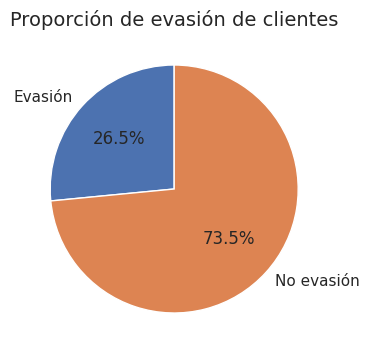

In [ ]:
# Creando una figura
plt.figure(figsize=(4,5))

# Creando un gráfico de pastel
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Titulo
plt.title('Proporción de evasión de clientes', fontsize = 14)

# Mostrando el gráfico
plt.show()

### Existe aproximadamente un 30% de perdida de clientes

## **Grafico de barras**
### Visualización de la proporcion de los clientes que permanecieron y los clientes que se dieron de baja

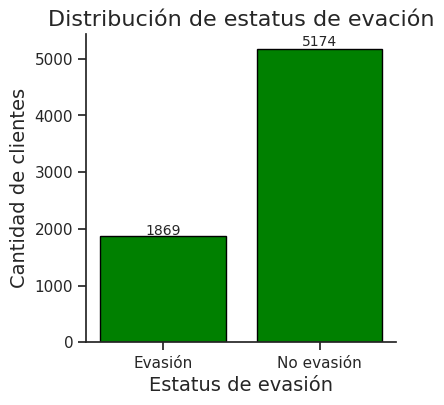

In [ ]:
# Creando una figura
plt.figure(figsize=(4,4))

# Creando un gráfico de pastel
plt.bar(labels, counts , color="green", edgecolor='black')

#Personalización del grafico
plt.title("Distribución de estatus de evación", fontsize=16)
plt.xlabel("Estatus de evasión",  fontsize=14)
plt.ylabel("Cantidad de clientes",  fontsize=14)

# etiqueta encima de las barras
for i, valor in enumerate(counts):
    plt.text(i, valor*1.01,str(valor), ha='center', fontsize=10)

# Mostrando el gráfico
plt.show()

## Grafico según la Evasión por genero, tipo de contrato, metodo de pago y meses de contrato del cliente

In [ ]:
#Primero renombramos la columna
datos_normalizados.rename(columns={'churn':'Baja','gender':'genero','internetservice':'servicio_internet',
                           'contract':'tipo_de_contrato','paymentmethod':'forma_pago'},inplace=True)
datos_normalizados.columns


Index(['customerid', 'Baja', 'genero', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'servicio_internet', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'tipo_de_contrato', 'paperlessbilling', 'forma_pago', 'charges_monthly',
       'charges_total', 'cuentas_diarias'],
      dtype='object')

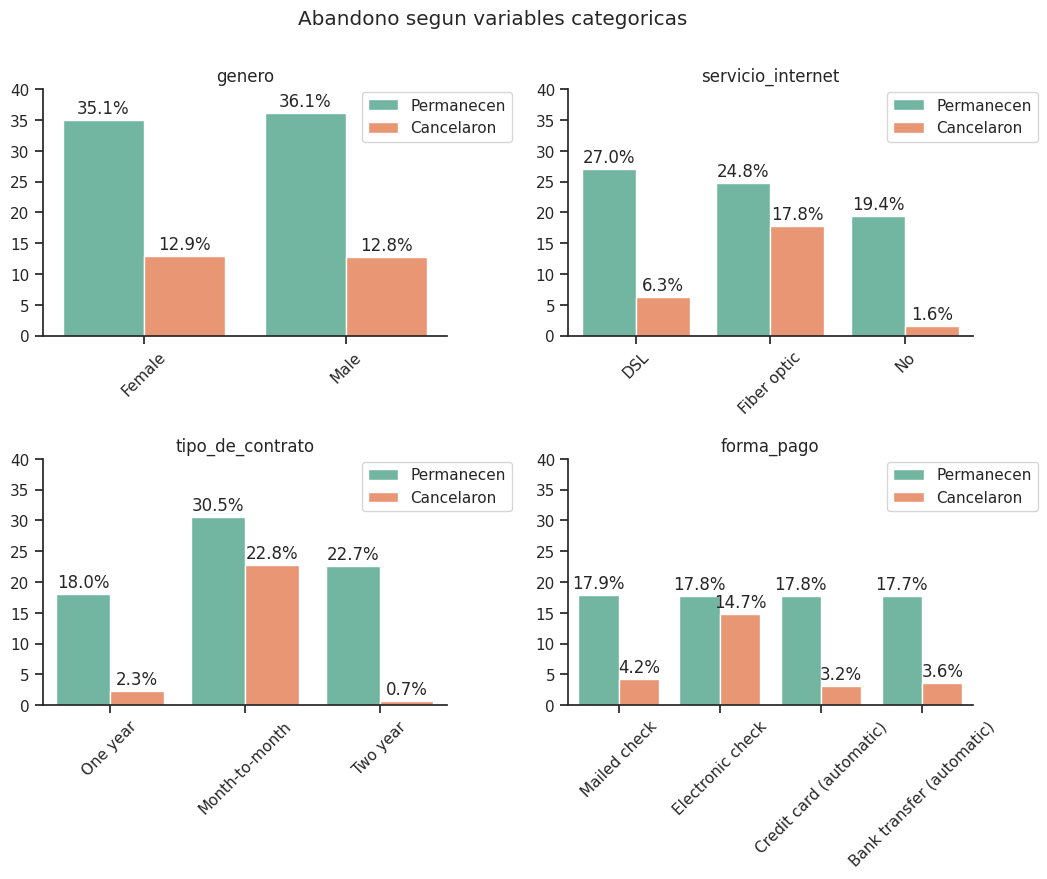

In [ ]:
#Creamos lista con las columnas que analizaremos
analisis=['genero','servicio_internet','tipo_de_contrato','forma_pago']

fig, axs=plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Abandono segun variables categoricas')
axs=axs.flatten()

#For para generacion multiple de graficas
for i, var in enumerate(analisis):
  ax=axs[i]
  ax=sns.countplot(data=datos_normalizados,x=var,hue='Baja',stat='percent',ax=ax,palette='Set2')
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}')
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0,40)
  ax.tick_params(axis='x',rotation=45)
  ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))

  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.show()


## **Conteo de evasión por variables numéricas**
## Grafico de evasión por total gastado y tiempo de contrato

In [ ]:
#Primero renombramos la columna
datos_normalizados.rename(columns={'tenure':'tiempo_de_contrato','charges_total':'total_gastado'},inplace=True)

#Creamos una lista con las columnas de analisis
col_numericas = ['tiempo_de_contrato','total_gastado']

In [ ]:
#For para generación de las graficas tipo box
for i in col_numericas:
  fig= px.violin(datos_normalizados,x='Baja',y=i,points='outliers',color='Baja')

  fig.update_layout(width=800,height=450,title=dict(text=f'Analisis de bajas por {i} total de clientes',x=0.5,xanchor='center'),
                    xaxis_title='',yaxis_title='Total',
                    font_family='Arial',font_size=20,font_color='black',
                    xaxis=dict(tickvals = [0, 1],ticktext=['Permanecen','Baja']),showlegend=False)

  fig.show()

In [ ]:
#For para generación de las graficas tipo box
for i in col_numericas:
  fig= px.box(datos_normalizados,x='Baja',y=i,points='outliers',color='Baja')

  fig.update_layout(width=800,height=450,title=dict(text=f'Analisis de bajas por {i} total de clientes',x=0.5,xanchor='center'),
                    xaxis_title='',yaxis_title='Total',
                    font_family='Arial',font_size=20,font_color='black',
                    xaxis=dict(tickvals = [0, 1],ticktext=['Permanecen','Baja']),showlegend=False)

  fig.show()

#📄Informe final

# Telecom X - Análisis de Evasión de Clientes (Churn)

## Introducción
Telecom X enfrenta una alta tasa de cancelaciones de clientes y necesita comprender los factores que explican esta evasión.  
El objetivo del análisis es identificar patrones y variables que influyen en la pérdida de clientes, generando información útil para estrategias de retención.  

En este proyecto se aplicaron procesos de **ETL (Extracción, Transformación y Carga)**, análisis exploratorio de datos y visualizaciones estratégicas para obtener insights relevantes.

## Limpieza y Tratamiento de Datos
- Los datos fueron cargados desde la **API de Telecom**.  
- Se realizaron las siguientes transformaciones:
  - **Uniformización de nombres de columnas** (formato en minúsculas y con guiones bajos).  
  - **Normalización de variables numéricas**.  
  - **Conversión de valores nulos** a `NaN` y completación de datos faltantes.  
  - **Codificación de variables categóricas** para su análisis.  

## Análisis Exploratorio de Datos (EDA)
Se realizaron distintos gráficos y análisis descriptivos:

1. **Proporción de evasión (gráfico de pastel)**  
   - Alrededor del **30% de clientes se dieron de baja**.  

2. **Total de clientes evadidos y no evadidos (gráfico de barras)**  
   - Se observa una clara diferencia de volumen entre clientes retenidos y evadidos.  

3. **Distribución de evasión por variables categóricas (gráficos de barras)**  
   - **Género:** proporción similar de evasión en hombres y mujeres (no es una variable determinante).  
   - **Servicio de internet:** los clientes con **Fiber Optic** se dieron de baja en mayor proporción.  
   - **Tipo de contrato:** los contratos **mes a mes** presentan la mayor tasa de cancelación, mientras que contratos de un año o más muestran mayor retención.  
   - **Forma de pago:** los clientes con **pago electrónico manual** presentan más cancelaciones.  

4. **Relación de evasión con variables numéricas (gráficos de violín)**  
   - Se analizaron variables como el **gasto total** y el **tiempo de contrato**.  
   - Los clientes con contratos cortos y gastos más bajos tienden a darse de baja con mayor frecuencia.  


## Conclusiones e Insights
- El **género** no influye significativamente en la evasión.  
- Los clientes con **Fiber Optic** muestran una mayor insatisfacción.  
- El **tipo de contrato mes a mes** es el mayor predictor de cancelaciones.  
- Los clientes que usan **pago electrónico manual** tienen mayor probabilidad de baja.  
- Los clientes con **contratos más largos** y **gasto total más alto** muestran menor propensión a la evasión.  

## Recomendaciones Estratégicas
- **Fomentar contratos a largo plazo:**  
  Ofrecer promociones y descuentos para clientes que migren de contratos mes a mes a contratos anuales o superiores.  
- **Mejorar el servicio de Fiber Optic:**  
  Revisar la calidad real del servicio ofrecido versus lo prometido, ya que concentra la mayor tasa de bajas.  
- **Optimizar métodos de pago:**  
  Promover el uso de pagos automáticos y simplificar el proceso de pago electrónico.  
- **Estrategias personalizadas de retención:**  
  Identificar clientes con contratos cortos y bajo gasto para ofrecer incentivos de permanencia (bonos de servicio, descuentos, upgrades).  

## Conclución

Se puede decir que el servicio ofrecido es el principal determinante en la evasión de clientes. A partir de ello se recomienda integrar metodos de recolecion de satisfacción y conocer los puntos debiles del servicio, tal como la velocidad de internet, la posible demora en el pago electronico, u otras razones por las cuales los clientes deciden darse de baja en el servicio. Teniendo como posibles soluciones la mejora de infraestructura y las estrategias de retencion.